In [1]:
import matplotlib.pyplot as plt

def Polt3D(data):
    ax = plt.subplot(projection = '3d')  
    ax.scatter(data[:,0],data[:,1],data[:,2], c = 'r')   
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

def Polt2D(data, index1=0, index2=1):

    #绘制前两个特征的二维散点图
    plt.scatter(data[:,index1], data[:,index2], alpha=0.8)
    plt.gca().set_aspect(1)

    for i in range(len(data[:,index1])):
        plt.annotate(
            i, 
            xy = (data[:,index1][i], data[:,index2][i]), 
            xytext = (data[:,index1][i]+0.05, data[:,index2][i]+0.05))

    plt.show()

In [2]:
from solver import *
from armatures import *
from models import *
import numpy as np
import config


np.random.seed(20160923)
pose_glb = np.zeros([1, 3]) # global rotation


########################## smpl settings ##########################
# note that in smpl and smpl-h no pca for pose is provided
# therefore in the model we fake an identity matrix as the pca coefficients
# to make the code compatible

n_pose = 23 * 3 # degrees of freedom, (n_joints - 1) * 3
n_shape = 10
pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)
shape = np.random.normal(size=n_shape)
mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=10)


########################## solving example ############################

wrapper = KinematicPCAWrapper(mesh, n_pose=n_pose)
solver = Solver(verbose=True)

_, keypoints = \
  mesh.set_params(pose_pca=pose_pca, pose_glb=pose_glb, shape=shape)

print('----------------------------------------------------------------------')
print('print keypoints')
print(keypoints)
print('print J_regressor_ext')
print(mesh.J_regressor_ext.shape)
print('print keypoints_ext')
print(mesh.armature.keypoints_ext)

params_est = solver.solve(wrapper, keypoints)

shape_est, pose_pca_est, pose_glb_est = wrapper.decode(params_est)

print('----------------------------------------------------------------------')
print('ground truth parameters')
print('pose pca coefficients:', pose_pca)
print('pose global rotation:', pose_glb)
print('shape: pca coefficients:', shape)

print('----------------------------------------------------------------------')
print('estimated parameters')
print('pose pca coefficients:', pose_pca_est)
print('pose global rotation:', pose_glb_est)
print('shape: pca coefficients:', shape_est)

mesh.set_params(pose_pca=pose_pca)
mesh.save_obj('./gt.obj')
mesh.set_params(pose_pca=pose_pca_est)
mesh.save_obj('./est.obj')

print('ground truth and estimated meshes are saved into gt.obj and est.obj')


----------------------------------------------------------------------
print keypoints
[[-3.92632874e-03 -2.16430786e+00  2.44914495e-01]
 [ 6.99819013e-01 -3.04340018e+00  1.54002080e-01]
 [-6.84639193e-01 -3.03077716e+00  1.78870289e-01]
 [-2.90823278e-02 -1.15961132e+00  4.93756261e-02]
 [ 9.14933152e-01 -6.44349485e+00  4.03805790e-01]
 [-1.49005771e+00 -6.41340778e+00  5.56533179e-01]
 [-1.21825912e-01  1.44245609e-01  3.39595561e-02]
 [ 1.19986248e+00 -9.96487265e+00  6.14682592e-01]
 [-2.28516887e+00 -9.85005527e+00  9.38493355e-01]
 [-1.33189026e-01  6.46447942e-01  2.97840556e-01]
 [ 1.73392717e+00 -1.03166100e+01  1.65038904e+00]
 [-2.35635579e+00 -1.01820358e+01  2.10740948e+00]
 [-7.49226306e-02  2.63849620e+00 -2.94573274e-01]
 [ 6.62823116e-01  1.77866256e+00 -1.07664718e-02]
 [-8.44332269e-01  1.73262767e+00 -2.79071952e-01]
 [-7.98535929e-02  3.22233054e+00  2.74464650e-01]
 [ 1.49962133e+00  2.13014702e+00  2.81233039e-02]
 [-1.70920308e+00  1.87671559e+00 -6.75457350e

In [3]:
from solver import *
from armatures import *
from models import *
import numpy as np
import config

def EstSMPLByKeypointAndScale(keypoints, scale):

    np.random.seed(20160923)

    pose_glb = np.zeros([1, 3]) # global rotation


    ########################## smpl settings ##########################
    # note that in smpl and smpl-h no pca for pose is provided
    # therefore in the model we fake an identity matrix as the pca coefficients
    # to make the code compatible

    n_pose = 23 * 3 # degrees of freedom, (n_joints - 1) * 3
    n_shape = 10
    pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)
    shape = np.random.normal(size=n_shape)
    mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=scale)

    ########################## solving params ############################

    wrapper = KinematicPCAWrapper(mesh, n_pose=n_pose)
    solver = Solver(verbose=True)
    
    # 求解
    params_est = solver.solve(wrapper, keypoints)
    
    shape_est, pose_pca_est, pose_glb_est = wrapper.decode(params_est)

    print('----------------------------------------------------------------------')
    print('estimated parameters')
    print('pose pca coefficients:', pose_pca_est)
    print('pose global rotation:', pose_glb_est)
    print('shape: pca coefficients:', shape_est)

    mesh.set_params(pose_pca=pose_pca_est)
    mesh.save_obj('./est.obj')

    print('estimated meshes is saved into est.obj')


In [4]:
import numpy as np

def GetValueInListByIndex(IndexName,Index,InputList):
    for Item in InputList:
        if Index == Item[IndexName]:
            return Item
    return None

def GetKeyPointsByJointsDataInorder(joints_data):
    if len(joints_data) < 28:
        print("Input Error, Need At Least 28 Joints To Get KeyPoints")


    keypoints =  np.zeros((29, 3))

    pos_x = "position_x"
    pos_y = "position_y"
    pos_z = "position_z"

    cnt = 0
    for joint in joints_data:
        keypoints[cnt] = np.array((joint[pos_x], joint[pos_y], joint[pos_z]))
        cnt += 1
    
    if cnt == 28:
        print("Compute Head Top Manually")

        # 使用 Neck+4*(Head-Neck) 计算头顶大致位置

        print("Neck Position:")
        neck_data = joints_data[12]
        neck_vec = np.array((neck_data[pos_x], neck_data[pos_y], neck_data[pos_z]))
        print(neck_vec)

        print("Head Position:")
        head_data = joints_data[15]
        head_vec = np.array((head_data[pos_x], head_data[pos_y], head_data[pos_z]))
        print(head_vec)

        print("Est Head Top Position:")
        head_top_vec = 4 * (head_vec - neck_vec) + neck_vec
        print(head_top_vec)

        keypoints[cnt] = head_top_vec

    return keypoints

def GetJointsDataFromFrameData(frame_data, joint_names):
    joints_data = []

    for joint_data in frame_data["joint_position"]:
        if joint_data["joint_name"] in joint_names:
            joints_data.append(joint_data)
    
    return joints_data

        

['Pelvis', 'L_Thigh', 'R_Thigh', 'Spine', 'L_Calf', 'R_Calf', 'Spine1', 'L_Foot', 'R_Foot', 'Spine2', 'L_FootTwist', 'R_FootTwist', 'Neck', 'L_Clavicle', 'R_Clavicle', 'Head', 'L_Shoulder', 'R_Shoulder', 'L_Forearm', 'R_Forearm', 'L_Hand', 'R_Hand', 'L_Weapon', 'R_Weapon', 'L_Finger22', 'R_Finger22', 'L_Toe0', 'R_Toe0', 'NONE']
Compute Head Top Manually
Neck Position:
[-0.00713522  3.62411504  0.06950287]
Head Position:
[-0.00822513  3.79644333  0.08108255]
Est Head Top Position:
[-0.01149488  4.31342818  0.1158216 ]
Plot Scatter


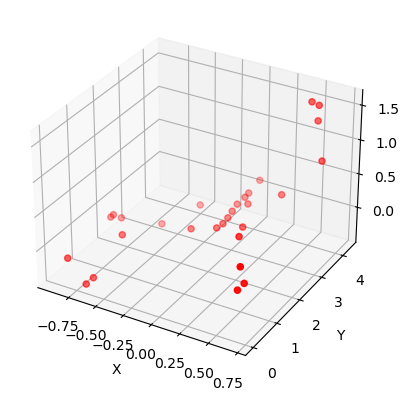

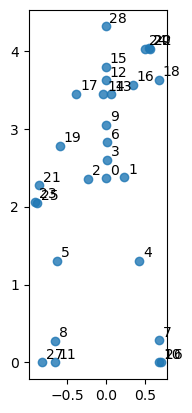

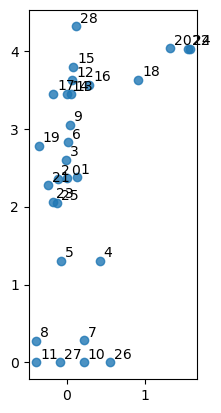

0 0.20921897888183594 3.0636405011244876
1 0.21672582626342773 0.6202510282808631
2 0.22991442680358887 0.37409011730052244
3 0.2126331329345703 0.5477723511720936
4 0.22118592262268066 0.24919308391577658
5 0.2160646915435791 0.5602647907417531
6 0.21315717697143555 1.2025807413809124
7 0.20972728729248047 2.3890216864693556
8 0.20866608619689941 2.9813156919602584
9 0.21084189414978027 0.8982449470286525
10 0.20891284942626953 1.1682491666369865
11 0.2091834545135498 2.651921088307824
12 0.20396828651428223 1.3908408726276504
13 0.2081902027130127 2.2951729540512873
14 0.20865631103515625 0.40987316457111483
15 0.2084801197052002 0.3004442840479684
16 0.2064220905303955 0.25053759178792867
17 0.20608019828796387 0.23126608080901917
18 0.2069687843322754 0.14094738968997886
19 0.20402741432189941 0.13535165406544805
20 0.20366382598876953 0.20869498690546054
21 0.21163415908813477 0.17112899158182182
22 0.20346808433532715 0.19723854264598548
23 0.20515704154968262 0.17017265236905357

In [5]:
import json
import pandas as pd
import numpy as np

# 获取映射关系
mapping = pd.read_csv("keys_mapping.csv")

key_joint_names = []

for row in mapping.index:
    key_joint_names.append(mapping.loc[row]['fbx_name'])

print(key_joint_names)



data_path = './TestData/'
file_name = 'a000_000030.json'

with open(data_path + file_name,'r',encoding = 'utf-8') as fp:
    data = json.load(fp)
 
    # print(data["file_basename"])

    # 取第一帧测试
    frame_data = data["frame_sequence"][0]
    # print(frame_data)


    # 获取关节点信息列表
    joints_data = GetJointsDataFromFrameData(frame_data, key_joint_names)
    # print(joints_data)


    # 关键词排序
    joints_data_inorder = []
    
    for key_joint in key_joint_names:
        joint = GetValueInListByIndex("joint_name",key_joint,joints_data)
        if joint == None:
            continue
        joints_data_inorder.append(joint)


    # 获取匹配np格式keypoints列表
    keypoints = GetKeyPointsByJointsDataInorder(joints_data_inorder)


    print("Plot Scatter")
    Polt3D(keypoints)
    Polt2D(keypoints)
    Polt2D(keypoints,2,1)

    # print("Print KeyPoints")
    # print(keypoints)

    # print("Begin Estimate")
    EstSMPLByKeypointAndScale(keypoints,2.7)

    




[ 0. 90.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


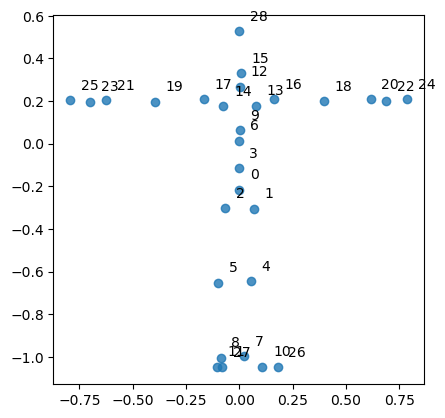

In [11]:
# 测试标准分布

from armatures import *
from models import *
import numpy as np
import config


np.random.seed(20160923)
pose_glb = np.zeros([1, 3]) 


n_pose = 23 * 3 
n_shape = 10
pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)

pose_pca = np.zeros(n_pose)

pose_pca[0] = 0
pose_pca[1] = 0
pose_pca[2] = 0

print(pose_pca)

shape = np.random.normal(size=n_shape)
mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=1)


_, keypoints = \
  mesh.set_params(pose_pca=pose_pca, pose_glb=pose_glb, shape=shape)

mesh.save_obj('./gt.obj')

# Polt3D(keypoints)

Polt2D(keypoints)

# Polt2D(keypoints,2,1)

# print(keypoints)




